In [376]:
# Created by Boonrit 22p25w0080 AiAT, Thailand

# Import Libs



In [1]:
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt


In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/AiAT/week2
%ls

/content/drive/My Drive/Colab Notebooks/AiAT/week2
22p25w0080_Boonrit_W2HW1_27092020.ipynb  Plant_1_Weather_Sensor_Data.csv
Plant_1_Generation_Data.csv


# Read File

In [4]:
plant_data = pd.read_csv("Plant_1_Generation_Data.csv")
sensor_data = pd.read_csv("Plant_1_Weather_Sensor_Data.csv")

In [5]:
plant_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


In [6]:
sensor_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [7]:
plant_data['PLANT_ID'].value_counts()
# we have only 1 plant_id(1 solar farm), so we can delete this column

4135001    68778
Name: PLANT_ID, dtype: int64

In [8]:
plant_data['SOURCE_KEY'].value_counts()
#some SOURCE_KEY data loss

bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ih0vzX44oOqAx2f    3130
ZnxXDlPa8U1GXgE    3130
wCURE6d3bPkepu2    3126
z9Y9gH1T5YWrNuG    3126
iCRJl6heRkivqQ3    3125
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
rGa61gmuvPhdLxV    3124
McdE0feGgRqW7Ca    3124
sjndEbLyjtCKgGv    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
zBIq5rxdHJRwDNY    3119
adLQvlD726eNBSB    3119
1IF53ai7Xc0U56Y    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: SOURCE_KEY, dtype: int64

In [9]:
plant_data = plant_data[['DATE_TIME', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']]
plant_data.head()
# filter only columns that we want to use them
# drop SOURCE_KEY because I want to estimate how much that this farm can produce every 15 mins 

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,0.0,0.0,0.0,6259559.0
1,15-05-2020 00:00,0.0,0.0,0.0,6183645.0
2,15-05-2020 00:00,0.0,0.0,0.0,6987759.0
3,15-05-2020 00:00,0.0,0.0,0.0,7602960.0
4,15-05-2020 00:00,0.0,0.0,0.0,7158964.0


In [10]:
plant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   DC_POWER     68778 non-null  float64
 2   AC_POWER     68778 non-null  float64
 3   DAILY_YIELD  68778 non-null  float64
 4   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), object(1)
memory usage: 2.6+ MB


In [11]:
plant_data.isnull().sum()

DATE_TIME      0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

In [12]:
sensor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [13]:
sensor_data.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [14]:
plant_data = plant_data.groupby('DATE_TIME')[['DC_POWER','AC_POWER', 'DAILY_YIELD','TOTAL_YIELD']].agg('sum')
# group data by DATE_TIME to see how much electricity the farm can generate

In [15]:
plant_data.head()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,
01-06-2020 00:00,0.0,0.0,5407.25,153519480.0
01-06-2020 00:15,0.0,0.0,0.00,153519480.0
01-06-2020 00:30,0.0,0.0,0.00,153519480.0
01-06-2020 00:45,0.0,0.0,0.00,153519480.0
01-06-2020 01:00,0.0,0.0,0.00,153519480.0


In [16]:
plant_data = plant_data.reset_index()

In [17]:
plant_data['DATE_TIME'] = pd.to_datetime(plant_data['DATE_TIME'], errors='coerce')
plant_data['time'] = plant_data['DATE_TIME'].dt.time
plant_data['date'] = pd.to_datetime(plant_data['DATE_TIME'].dt.date)
plant_data['hour'] = plant_data['DATE_TIME'].dt.hour

In [18]:
plant_data.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,time,date,hour
0,2020-01-06 00:00:00,0.0,0.0,5407.25,153519480.0,00:00:00,2020-01-06,0
1,2020-01-06 00:15:00,0.0,0.0,0.00,153519480.0,00:15:00,2020-01-06,0
2,2020-01-06 00:30:00,0.0,0.0,0.00,153519480.0,00:30:00,2020-01-06,0
3,2020-01-06 00:45:00,0.0,0.0,0.00,153519480.0,00:45:00,2020-01-06,0
4,2020-01-06 01:00:00,0.0,0.0,0.00,153519480.0,01:00:00,2020-01-06,1


In [19]:
plant_data = plant_data[['date', 'time', 'hour', 'DC_POWER', 'AC_POWER','DAILY_YIELD', 'TOTAL_YIELD']]
plant_data.head()

,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-01-06,00:00:00,0,0.0,0.0,5407.25,153519480.0
1,2020-01-06,00:15:00,0,0.0,0.0,0.00,153519480.0
2,2020-01-06,00:30:00,0,0.0,0.0,0.00,153519480.0
3,2020-01-06,00:45:00,0,0.0,0.0,0.00,153519480.0
4,2020-01-06,01:00:00,1,0.0,0.0,0.00,153519480.0


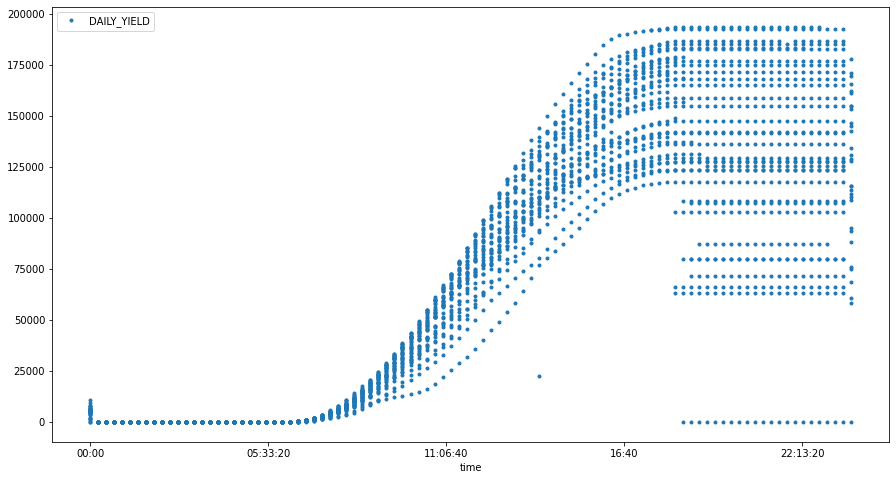

In [20]:
plant_data.plot(x= 'time', y='DAILY_YIELD', style='.', figsize = (15, 8))
plt.show()

In [21]:
# the production will increase from 6.00 and begin to stabilize around 19.00.

In [22]:
sensor_data['DATE_TIME'] = pd.to_datetime(sensor_data['DATE_TIME'], errors='coerce')
sensor_data['date'] = pd.to_datetime(pd.to_datetime(sensor_data['DATE_TIME']).dt.date)
sensor_data['time'] = pd.to_datetime(sensor_data['DATE_TIME']).dt.time
sensor_data = sensor_data[['date', 'time', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
sensor_data.head()

,date,time,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,00:00:00,25.184316,22.857507,0.0
1,2020-05-15,00:15:00,25.084589,22.761668,0.0
2,2020-05-15,00:30:00,24.935753,22.592306,0.0
3,2020-05-15,00:45:00,24.846130,22.360852,0.0
4,2020-05-15,01:00:00,24.621525,22.165423,0.0


# Merge Data

In [23]:
#Merge 2 data together
merge_data = plant_data.merge(sensor_data, left_on=['date', 'time'], right_on=['date', 'time'])
merge_data.head(10)

,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-06-06,00:00:00,0,0.0,0.0,2000.821429,154327840.0,22.474874,19.655617,0.0
1,2020-06-06,00:15:00,0,0.0,0.0,0.000000,154327840.0,22.446710,19.740186,0.0
2,2020-06-06,00:30:00,0,0.0,0.0,0.000000,154327840.0,22.326310,19.624400,0.0
3,2020-06-06,00:45:00,0,0.0,0.0,0.000000,154327840.0,22.243927,19.516772,0.0
4,2020-06-06,01:00:00,1,0.0,0.0,0.000000,154327840.0,22.207804,19.512128,0.0
5,2020-06-06,01:15:00,1,0.0,0.0,0.000000,154327840.0,22.231022,19.660040,0.0
6,2020-06-06,01:30:00,1,0.0,0.0,0.000000,154327840.0,22.152329,19.582957,0.0
7,2020-06-06,01:45:00,1,0.0,0.0,0.000000,154327840.0,21.982916,19.361709,0.0
8,2020-06-06,02:00:00,2,0.0,0.0,0.000000,154327840.0,21.921014,19.488367,0.0
9,2020-06-06,02:15:00,2,0.0,0.0,0.000000,154327840.0,21.976127,19.531504,0.0


In [24]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 2101
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 2102 non-null   datetime64[ns]
 1   time                 2102 non-null   object        
 2   hour                 2102 non-null   int64         
 3   DC_POWER             2102 non-null   float64       
 4   AC_POWER             2102 non-null   float64       
 5   DAILY_YIELD          2102 non-null   float64       
 6   TOTAL_YIELD          2102 non-null   float64       
 7   AMBIENT_TEMPERATURE  2102 non-null   float64       
 8   MODULE_TEMPERATURE   2102 non-null   float64       
 9   IRRADIATION          2102 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 180.6+ KB


In [25]:
merge_data = merge_data.drop(0)
merge_data.shape

(2101, 10)

In [26]:
merge_data.head()

,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1,2020-06-06,00:15:00,0,0.0,0.0,0.0,154327840.0,22.446710,19.740186,0.0
2,2020-06-06,00:30:00,0,0.0,0.0,0.0,154327840.0,22.326310,19.624400,0.0
3,2020-06-06,00:45:00,0,0.0,0.0,0.0,154327840.0,22.243927,19.516772,0.0
4,2020-06-06,01:00:00,1,0.0,0.0,0.0,154327840.0,22.207804,19.512128,0.0
5,2020-06-06,01:15:00,1,0.0,0.0,0.0,154327840.0,22.231022,19.660040,0.0


In [27]:
merge_data=merge_data.reset_index()

In [28]:
pd.set_option('display.max_rows', None)

In [29]:
merge_data.shape

(2101, 11)

# Filter data in range time 6.00-18.45

In [32]:
#I Filter only data in range 6.00-18.45 to consturct the model
merge_data = merge_data[merge_data['hour']>=6.00]
merge_data = merge_data[merge_data['hour']<=18.00]

In [34]:
merge_data.shape

(1164, 11)

In [35]:
merge_data.head(10)

,index,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
23,24,2020-06-06,06:00:00,6,2962.892857,285.941071,14.410714,1.543279e+08,20.426455,18.254061,0.011280
24,25,2020-06-06,06:15:00,6,9305.089286,899.548214,165.732143,1.543280e+08,21.026064,19.168304,0.031878
25,26,2020-06-06,06:30:00,6,16430.660714,1593.266071,455.892857,1.543283e+08,21.303878,19.903894,0.050543
26,27,2020-06-06,06:45:00,6,31964.696430,3120.148214,1017.142857,1.543289e+08,21.767554,21.045221,0.108367
27,28,2020-06-06,07:00:00,7,58156.535715,5705.450000,2131.125000,1.543300e+08,22.418231,24.001371,0.241691
28,29,2020-06-06,07:15:00,7,73587.589285,7228.667857,3690.339286,1.543315e+08,23.072224,26.810551,0.291636
29,30,2020-06-06,07:30:00,7,84269.464286,8281.275000,5687.625000,1.543335e+08,23.439154,29.627557,0.319218
30,31,2020-06-06,07:45:00,7,100269.196428,9840.076786,7925.482143,1.543358e+08,24.040710,33.153322,0.365894
31,32,2020-06-06,08:00:00,8,114398.053571,11214.489286,10591.017857,1.543384e+08,24.830982,37.333905,0.408999
32,33,2020-06-06,08:15:00,8,118549.125000,11620.667857,13398.357143,1.543412e+08,25.266467,38.909503,0.421339


In [36]:
merge_data = merge_data.reset_index()

In [39]:
#merge_data = merge_data.reset_index()
#merge_data = merge_data.drop(columns=['index'])
merge_data = merge_data.drop(columns=['level_0'])

In [40]:
merge_data.head(5)

,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-06-06,06:00:00,6,2962.892857,285.941071,14.410714,1.543279e+08,20.426455,18.254061,0.011280
1,2020-06-06,06:15:00,6,9305.089286,899.548214,165.732143,1.543280e+08,21.026064,19.168304,0.031878
2,2020-06-06,06:30:00,6,16430.660714,1593.266071,455.892857,1.543283e+08,21.303878,19.903894,0.050543
3,2020-06-06,06:45:00,6,31964.696430,3120.148214,1017.142857,1.543289e+08,21.767554,21.045221,0.108367
4,2020-06-06,07:00:00,7,58156.535715,5705.450000,2131.125000,1.543300e+08,22.418231,24.001371,0.241691


In [41]:
print(merge_data.iloc[0, 1].hour)
print(merge_data.iloc[0, 1].minute)

6
0


In [42]:
 merge_data.iloc[2, 5]

455.89285714999994

# Creating the PROCDUCED_YIELD column

In [43]:
merge_data["PROCDUCED_YIELD"] = np.nan
for i in range(merge_data.shape[0]):
  if ((merge_data.iloc[i, 1].hour == 6) and (merge_data.iloc[i, 1].minute ==0)):
    merge_data.iloc[i, 10]= merge_data.iloc[i, 5]
  else:
    merge_data.iloc[i, 10]= merge_data.iloc[i, 5] - merge_data.iloc[(i-1), 5]

In [44]:
merge_data.head(52)
#52 row  approximates 1 days

,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PROCDUCED_YIELD
0,2020-06-06,06:00:00,6,2962.892857,285.941071,14.410714,1.543279e+08,20.426455,18.254061,0.011280,14.410714
1,2020-06-06,06:15:00,6,9305.089286,899.548214,165.732143,1.543280e+08,21.026064,19.168304,0.031878,151.321429
2,2020-06-06,06:30:00,6,16430.660714,1593.266071,455.892857,1.543283e+08,21.303878,19.903894,0.050543,290.160714
3,2020-06-06,06:45:00,6,31964.696430,3120.148214,1017.142857,1.543289e+08,21.767554,21.045221,0.108367,561.250000
4,2020-06-06,07:00:00,7,58156.535715,5705.450000,2131.125000,1.543300e+08,22.418231,24.001371,0.241691,1113.982143
5,2020-06-06,07:15:00,7,73587.589285,7228.667857,3690.339286,1.543315e+08,23.072224,26.810551,0.291636,1559.214286
6,2020-06-06,07:30:00,7,84269.464286,8281.275000,5687.625000,1.543335e+08,23.439154,29.627557,0.319218,1997.285714
7,2020-06-06,07:45:00,7,100269.196428,9840.076786,7925.482143,1.543358e+08,24.040710,33.153322,0.365894,2237.857143
8,2020-06-06,08:00:00,8,114398.053571,11214.489286,10591.017857,1.543384e+08,24.830982,37.333905,0.408999,2665.535714
9,2020-06-06,08:15:00,8,118549.125000,11620.667857,13398.357143,1.543412e+08,25.266467,38.909503,0.421339,2807.339286


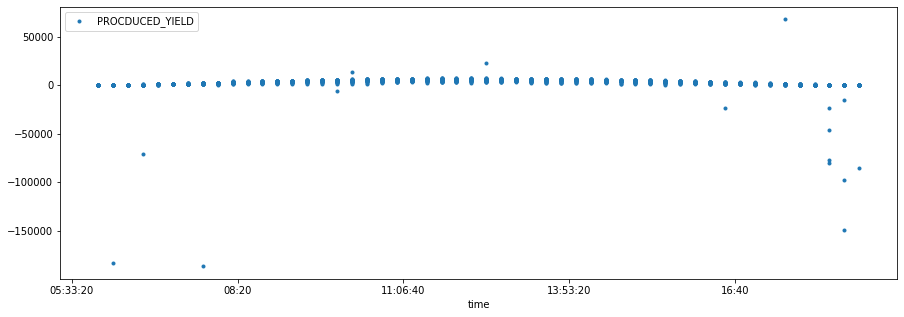

In [46]:
merge_data.plot(x = 'time', y='PROCDUCED_YIELD', style='.', figsize = (15, 5))
plt.show()
# you can see some outlier, so we have to remove them

In [48]:
# remove the negative values
merge_data[merge_data['PROCDUCED_YIELD'] < 0]

,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PROCDUCED_YIELD
49,2020-06-06,18:15:00,18,1074.553571,103.639286,63088.392857,6.823949e+07,24.031464,23.445373,0.008883,-76659.589286
557,2020-05-19,16:30:00,16,82900.875000,8135.712500,118021.250000,1.248661e+08,29.657731,39.182701,0.328668,-23929.303570
603,2020-05-21,07:45:00,7,76297.850000,7494.900000,6938.850000,1.516747e+08,23.530554,30.403243,0.322396,-186831.150000
604,2020-05-21,08:00:00,8,94341.833333,9250.496667,6704.933333,1.516759e+08,23.968256,33.119169,0.364678,-233.916667
612,2020-05-21,10:00:00,10,133977.304762,13093.902857,30325.000001,1.517085e+08,28.207800,53.517202,0.700566,-6368.250000
645,2020-05-21,18:15:00,18,1796.267857,173.317857,123625.892857,1.123631e+08,27.694161,26.271602,0.010051,-46535.392857
646,2020-05-21,18:30:00,18,0.000000,0.000000,108152.000000,9.745511e+07,27.578023,25.854665,0.001568,-15473.892857
699,2020-05-22,18:45:00,18,0.000000,0.000000,71595.000000,6.712221e+07,27.857528,26.235675,0.000028,-85103.000000
700,2020-05-23,06:45:00,6,14655.700000,1419.493333,562.166667,1.519953e+08,22.344630,22.086662,0.045444,-71032.833333
902,2020-05-26,18:15:00,18,1854.000000,179.100000,149008.000000,1.325785e+08,29.093020,28.168933,0.024506,-23112.803572


In [49]:
merge_data = merge_data[merge_data.iloc[:, 10] >=0]

In [50]:
merge_data.shape

(1150, 11)

In [51]:
merge_data.head()

,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PROCDUCED_YIELD
0,2020-06-06,06:00:00,6,2962.892857,285.941071,14.410714,1.543279e+08,20.426455,18.254061,0.011280,14.410714
1,2020-06-06,06:15:00,6,9305.089286,899.548214,165.732143,1.543280e+08,21.026064,19.168304,0.031878,151.321429
2,2020-06-06,06:30:00,6,16430.660714,1593.266071,455.892857,1.543283e+08,21.303878,19.903894,0.050543,290.160714
3,2020-06-06,06:45:00,6,31964.696430,3120.148214,1017.142857,1.543289e+08,21.767554,21.045221,0.108367,561.250000
4,2020-06-06,07:00:00,7,58156.535715,5705.450000,2131.125000,1.543300e+08,22.418231,24.001371,0.241691,1113.982143


In [52]:
merge_data = merge_data.reset_index()
merge_data = merge_data.drop(columns=['index'])
merge_data.head()

,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PROCDUCED_YIELD
0,2020-06-06,06:00:00,6,2962.892857,285.941071,14.410714,1.543279e+08,20.426455,18.254061,0.011280,14.410714
1,2020-06-06,06:15:00,6,9305.089286,899.548214,165.732143,1.543280e+08,21.026064,19.168304,0.031878,151.321429
2,2020-06-06,06:30:00,6,16430.660714,1593.266071,455.892857,1.543283e+08,21.303878,19.903894,0.050543,290.160714
3,2020-06-06,06:45:00,6,31964.696430,3120.148214,1017.142857,1.543289e+08,21.767554,21.045221,0.108367,561.250000
4,2020-06-06,07:00:00,7,58156.535715,5705.450000,2131.125000,1.543300e+08,22.418231,24.001371,0.241691,1113.982143


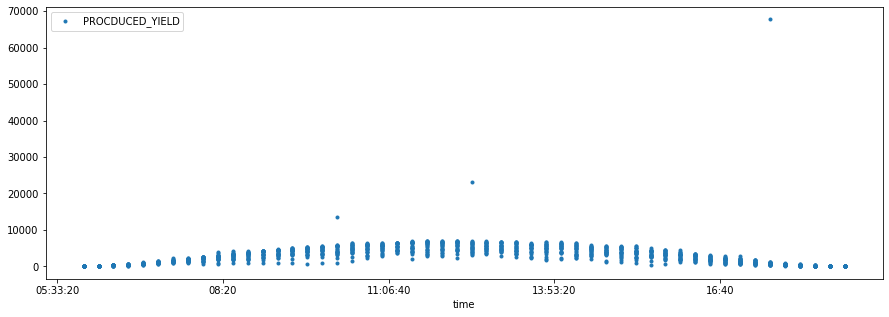

In [54]:
merge_data.plot(x = 'time', y='PROCDUCED_YIELD', style='.', figsize = (15, 5))
plt.show()
# There are some outlier, that higher than 10k

In [56]:
merge_data = merge_data[merge_data.iloc[:, 10] <=10000]
#remove them

In [57]:
merge_data = merge_data.reset_index()
merge_data = merge_data.drop(columns=['index'])
merge_data.head()

,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PROCDUCED_YIELD
0,2020-06-06,06:00:00,6,2962.892857,285.941071,14.410714,1.543279e+08,20.426455,18.254061,0.011280,14.410714
1,2020-06-06,06:15:00,6,9305.089286,899.548214,165.732143,1.543280e+08,21.026064,19.168304,0.031878,151.321429
2,2020-06-06,06:30:00,6,16430.660714,1593.266071,455.892857,1.543283e+08,21.303878,19.903894,0.050543,290.160714
3,2020-06-06,06:45:00,6,31964.696430,3120.148214,1017.142857,1.543289e+08,21.767554,21.045221,0.108367,561.250000
4,2020-06-06,07:00:00,7,58156.535715,5705.450000,2131.125000,1.543300e+08,22.418231,24.001371,0.241691,1113.982143


In [72]:
merge_data.head(50)

,date,time,hour,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PROCDUCED_YIELD
0,2020-06-06,06:00:00,6,2962.892857,285.941071,14.410714,1.543279e+08,20.426455,18.254061,0.011280,14.410714
1,2020-06-06,06:15:00,6,9305.089286,899.548214,165.732143,1.543280e+08,21.026064,19.168304,0.031878,151.321429
2,2020-06-06,06:30:00,6,16430.660714,1593.266071,455.892857,1.543283e+08,21.303878,19.903894,0.050543,290.160714
3,2020-06-06,06:45:00,6,31964.696430,3120.148214,1017.142857,1.543289e+08,21.767554,21.045221,0.108367,561.250000
4,2020-06-06,07:00:00,7,58156.535715,5705.450000,2131.125000,1.543300e+08,22.418231,24.001371,0.241691,1113.982143
5,2020-06-06,07:15:00,7,73587.589285,7228.667857,3690.339286,1.543315e+08,23.072224,26.810551,0.291636,1559.214286
6,2020-06-06,07:30:00,7,84269.464286,8281.275000,5687.625000,1.543335e+08,23.439154,29.627557,0.319218,1997.285714
7,2020-06-06,07:45:00,7,100269.196428,9840.076786,7925.482143,1.543358e+08,24.040710,33.153322,0.365894,2237.857143
8,2020-06-06,08:00:00,8,114398.053571,11214.489286,10591.017857,1.543384e+08,24.830982,37.333905,0.408999,2665.535714
9,2020-06-06,08:15:00,8,118549.125000,11620.667857,13398.357143,1.543412e+08,25.266467,38.909503,0.421339,2807.339286


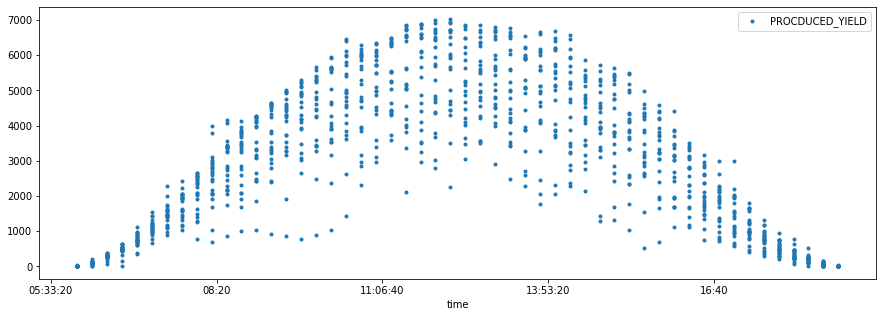

In [59]:
merge_data.plot(x = 'time', y='PROCDUCED_YIELD', style='.', figsize = (15, 5))
plt.show()
#Pretty good

# Try OLS model

In [60]:
import statsmodels.api as sm
Y = merge_data['PROCDUCED_YIELD']
X = merge_data.drop(columns = ['PROCDUCED_YIELD', 'date', 'time', 'DAILY_YIELD', 'TOTAL_YIELD']  ,axis=1)
X = sm.add_constant(X)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [61]:
produced_energy_model_v1 = sm.OLS(Y,X).fit()
produced_energy_model_v1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.977     
Dependent Variable:     PROCDUCED_YIELD     AIC:                   16420.5446
Date:                   2020-10-01 14:54    BIC:                   16455.8590
No. Observations:       1147                Log-Likelihood:        -8203.3   
Df Model:               6                   F-statistic:           8240.     
Df Residuals:           1140                Prob (F-statistic):    0.00      
R-squared:              0.977               Scale:                 96002.    
-----------------------------------------------------------------------------
                      Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------------
const                -223.2910  96.5256  -2.3133 0.0209  -412.6787   -33.9033
hour                   10.4728   3.7450   2.7965 0.0053     3.1249    17.8207
DC_POWER               -0.0325   0.0382  -0.8518 0.3945    -0.1075     0.0424
AC_POWER                0.5242   0.3869   1.3548 0.1757    -0.2350     1.2834
AMBIENT_TEMPERATURE  -113.2922   6.8246 -16.6006 0.0000  -126.6824   -99.9021
MODULE_TEMPERATURE    125.7665   3.8104  33.0058 0.0000   118.2902   133.2427
IRRADIATION         -2478.3449 332.2492  -7.4593 0.0000 -3130.2334 -1826.4563
-----------------------------------------------------------------------------
Omnibus:                 83.353           Durbin-Watson:              1.686  
Prob(Omnibus):           0.000            Jarque-Bera (JB):           382.311
Skew:                    0.112            Prob(JB):                   0.000  
Kurtosis:                5.819            Condition No.:              5568057
=============================================================================
* The condition number is large (6e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [62]:
Y = merge_data['PROCDUCED_YIELD']
X = merge_data.drop(columns = ['PROCDUCED_YIELD', 'date', 'time', 'DAILY_YIELD', 'TOTAL_YIELD']  ,axis=1)
X = sm.add_constant(X)

In [63]:
produced_energy_model_v2 = sm.OLS(Y,X).fit()
produced_energy_model_v2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
=============================================================================
Model:                  OLS                 Adj. R-squared:        0.977     
Dependent Variable:     PROCDUCED_YIELD     AIC:                   16420.5446
Date:                   2020-10-01 14:54    BIC:                   16455.8590
No. Observations:       1147                Log-Likelihood:        -8203.3   
Df Model:               6                   F-statistic:           8240.     
Df Residuals:           1140                Prob (F-statistic):    0.00      
R-squared:              0.977               Scale:                 96002.    
-----------------------------------------------------------------------------
                      Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
-----------------------------------------------------------------------------
const                -223.2910  96.5256  -2.3133 0.0209  -412.6787   -33.9033
hour                   10.4728   3.7450   2.7965 0.0053     3.1249    17.8207
DC_POWER               -0.0325   0.0382  -0.8518 0.3945    -0.1075     0.0424
AC_POWER                0.5242   0.3869   1.3548 0.1757    -0.2350     1.2834
AMBIENT_TEMPERATURE  -113.2922   6.8246 -16.6006 0.0000  -126.6824   -99.9021
MODULE_TEMPERATURE    125.7665   3.8104  33.0058 0.0000   118.2902   133.2427
IRRADIATION         -2478.3449 332.2492  -7.4593 0.0000 -3130.2334 -1826.4563
-----------------------------------------------------------------------------
Omnibus:                 83.353           Durbin-Watson:              1.686  
Prob(Omnibus):           0.000            Jarque-Bera (JB):           382.311
Skew:                    0.112            Prob(JB):                   0.000  
Kurtosis:                5.819            Condition No.:              5568057
=============================================================================
* The condition number is large (6e+06). This might indicate
strong multicollinearity or other numerical problems.
"""

In [64]:
Y = merge_data['PROCDUCED_YIELD']
X = merge_data.drop(columns = ['PROCDUCED_YIELD', 'date', 'time', 'DAILY_YIELD', 'TOTAL_YIELD']  ,axis=1)
#X = sm.add_constant(X)
produced_energy_model_v3 = sm.OLS(Y,X).fit()
produced_energy_model_v3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.993     
Dependent Variable:     PROCDUCED_YIELD  AIC:                         16423.9162
Date:                   2020-10-01 14:54 BIC:                         16454.1856
No. Observations:       1147             Log-Likelihood:              -8206.0   
Df Model:               6                F-statistic:                 2.714e+04 
Df Residuals:           1141             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.993            Scale:                       96368.    
--------------------------------------------------------------------------------
                         Coef.    Std.Err.    t     P>|t|    [0.025     0.975]  
--------------------------------------------------------------------------------
hour                      14.3093   3.3642   4.2534 0.0000     7.7086    20.9100
DC_POWER                  -0.0338   0.0383  -0.8833 0.3773    -0.1089     0.0413
AC_POWER                   0.5363   0.3876   1.3834 0.1668    -0.2243     1.2968
AMBIENT_TEMPERATURE     -126.2911   3.8803 -32.5467 0.0000  -133.9044  -118.6777
MODULE_TEMPERATURE       128.4801   3.6323  35.3716 0.0000   121.3533   135.6068
IRRADIATION            -2481.0205 332.8801  -7.4532 0.0000 -3134.1464 -1827.8947
--------------------------------------------------------------------------------
Omnibus:                  79.933            Durbin-Watson:               1.659  
Prob(Omnibus):            0.000             Jarque-Bera (JB):            345.318
Skew:                     0.126             Prob(JB):                    0.000  
Kurtosis:                 5.676             Condition No.:               5568019
================================================================================
* The condition number is large (6e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

# Create 10 Folds

In [65]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.90, random_state=38)

## Overall train/test

In [67]:
produced_energy_model_overall = sm.OLS(y_train,X_train).fit()
produced_energy_model_overall.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.993     
Dependent Variable:     PROCDUCED_YIELD  AIC:                         1647.6159 
Date:                   2020-10-01 14:54 BIC:                         1664.0331 
No. Observations:       114              Log-Likelihood:              -817.81   
Df Model:               6                F-statistic:                 2875.     
Df Residuals:           108              Prob (F-statistic):          1.13e-116 
R-squared (uncentered): 0.994            Scale:                       1.0521e+05
--------------------------------------------------------------------------------
                          Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------------------
hour                        7.4107  10.8988  0.6800 0.4980   -14.1926    29.0140
DC_POWER                    0.3309   0.1378  2.4015 0.0180     0.0578     0.6041
AC_POWER                   -3.1392   1.3983 -2.2449 0.0268    -5.9109    -0.3674
AMBIENT_TEMPERATURE      -128.9746  13.2269 -9.7509 0.0000  -155.1927  -102.7566
MODULE_TEMPERATURE        136.5390  12.9192 10.5687 0.0000   110.9309   162.1470
IRRADIATION             -4303.2122 931.6562 -4.6189 0.0000 -6149.9165 -2456.5079
--------------------------------------------------------------------------------
Omnibus:                  15.276            Durbin-Watson:               2.348  
Prob(Omnibus):            0.000             Jarque-Bera (JB):            29.715 
Skew:                     0.527             Prob(JB):                    0.000  
Kurtosis:                 5.268             Condition No.:               4991247
================================================================================
* The condition number is large (5e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [68]:
res = produced_energy_model_overall.predict(X_test)

In [69]:
rms = sqrt(mean_squared_error(y_test, res))
print("rms: "+str(rms))

rms: 334.32155290957365


In [70]:
#X.head()

In [71]:
#X.shape[0]

## Training and Testing with 10 Folds

In [ ]:
index_kf1=[]
index_kf2=[]
index_kf3=[]
index_kf4=[]
index_kf5=[]
index_kf6=[]
index_kf7=[]
index_kf8=[]
index_kf9=[]
index_kf10=[]
for i in range(X.shape[0]):
  if i % 10 == 1:
    index_kf1.append(i)
  elif i % 10 == 2:
    index_kf2.append(i)
  elif i % 10 == 3:
    index_kf3.append(i)
  elif i % 10 == 4:
    index_kf4.append(i)
  elif i % 10 == 5:
    index_kf5.append(i)
  elif i % 10 == 6:
    index_kf6.append(i)
  elif i % 10 == 7:
    index_kf7.append(i)
  elif i % 10 == 8:
    index_kf8.append(i)
  elif i % 10 == 9:
    index_kf9.append(i)
  elif i % 10 == 0:
    index_kf10.append(i)

In [ ]:
kf1 = X.iloc[index_kf1, :]
kf2= X.iloc[index_kf2, :]
kf3= X.iloc[index_kf3, :]
kf4= X.iloc[index_kf4, :]
kf5= X.iloc[index_kf5, :]
kf6= X.iloc[index_kf6, :]
kf7= X.iloc[index_kf7, :]
kf8= X.iloc[index_kf8, :]
kf9= X.iloc[index_kf9, :]
kf10= X.iloc[index_kf10, :]

Y1 = Y[index_kf1]
Y2 = Y[index_kf2]
Y3 = Y[index_kf3]
Y4 = Y[index_kf4]
Y5 = Y[index_kf5]
Y6 = Y[index_kf6]
Y7 = Y[index_kf7]
Y8 = Y[index_kf8]
Y9 = Y[index_kf9]
Y10= Y[index_kf10]

In [ ]:
model_kf1 = sm.OLS(Y1,kf1).fit()
model_kf2 = sm.OLS(Y2,kf2).fit()
model_kf3 = sm.OLS(Y3,kf3).fit()
model_kf4 = sm.OLS(Y4,kf4).fit()
model_kf5 = sm.OLS(Y5,kf5).fit()
model_kf6 = sm.OLS(Y6,kf6).fit()
model_kf7 = sm.OLS(Y7,kf7).fit()
model_kf8 = sm.OLS(Y8,kf8).fit()
model_kf9 = sm.OLS(Y9,kf9).fit()
model_kf10 = sm.OLS(Y10,kf10).fit()

In [ ]:
res1 = model_kf1.predict(X_test)
res2 = model_kf2.predict(X_test)
res3 = model_kf3.predict(X_test)
res4 = model_kf4.predict(X_test)
res5 = model_kf5.predict(X_test)
res6 = model_kf6.predict(X_test)
res7 = model_kf7.predict(X_test)
res8 = model_kf8.predict(X_test)
res9 = model_kf9.predict(X_test)
res10 = model_kf10.predict(X_test) 

In [ ]:
rms = []
rms.append(sqrt(mean_squared_error(y_test, res1)))
rms.append(sqrt(mean_squared_error(y_test, res2)))
rms.append(sqrt(mean_squared_error(y_test, res3)))
rms.append(sqrt(mean_squared_error(y_test, res4)))
rms.append(sqrt(mean_squared_error(y_test, res5)))
rms.append(sqrt(mean_squared_error(y_test, res6)))
rms.append(sqrt(mean_squared_error(y_test, res7)))
rms.append(sqrt(mean_squared_error(y_test, res8)))
rms.append(sqrt(mean_squared_error(y_test, res9)))
rms.append(sqrt(mean_squared_error(y_test, res10)))

In [ ]:
rms

[323.77535867638943,
 310.05260987218765,
 312.2334653888914,
 316.8227550141231,
 311.4294118379609,
 311.2641777473937,
 312.78406889116775,
 309.6056539513689,
 326.60735029669934,
 316.3623356093956]

In [ ]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [ ]:
average = Average(rms) 
print("Average of the rmse =", round(average, 2)) 

Average of the rmse = 315.09


# My Idea

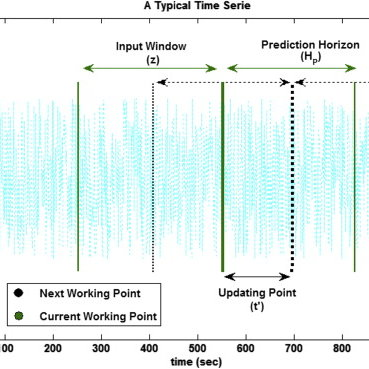

ref pic : https://www.researchgate.net/publication/269723780_Vehicle_speed_prediction_via_a_sliding-window_time_series_analysis_and_an_evolutionary_least_learning_machine_A_case_study_on_San_Francisco_urban_roads/figures?lo=1&utm_source=google&utm_medium=organic

My idea is to create an OLS model within one window (n days), to predict the next day's result. After that, moving the window and updating the points, then continue training the OLS model until the end of the data.

# OLS model with Data 3 days to predict 4th day

In [ ]:
Y = merge_data['PROCDUCED_YIELD']
X = merge_data.drop(columns = ['PROCDUCED_YIELD', 'date', 'time', 'DAILY_YIELD', 'TOTAL_YIELD']  ,axis=1)
X = sm.add_constant(X)
# from explor data above 1 day uses 51 rows <6.00-18.45>
# so the 3 days use 153 rows

In [ ]:
# 22*52 = 1144
produced_sum_list=[]
result_sum_list = []
for i in range(20):
  start = i*52
  stop = (i+2)*52
  temp_model = sm.OLS(Y[start:stop],X[start:stop]).fit()
  #three_days_model.summary2()
  # res is the energy that can produce every 15 mins
  res = temp_model.predict(X[((i+3)*52):((i+4)*52)])
  produced_sum_list.append(Y[((i+3)*52):((i+4)*52)].sum())
  # res.sum = daily_yield
  result_sum_list.append(res.sum())

In [ ]:
# the results from the OLS model are the energy that farm can produce everyday within one window
result_sum_list

[139184.80878947934,
 153531.33330553008,
 143825.54376169213,
 134121.4896952108,
 173842.48694918698,
 122270.23372271445,
 117255.008016219,
 130968.88721482918,
 271945.55694265116,
 172340.95308139597,
 196317.07353573735,
 178083.6513523946,
 194468.09815035944,
 172018.92238471442,
 159448.94090698837,
 178244.96477047843,
 185342.57727936588,
 149322.03413626782,
 124430.972884158,
 411.06248764542056]

In [ ]:
produced_sum_list

[137483.785714287,
 147605.78571428498,
 142112.553571428,
 136429.0,
 165105.875,
 129985.73214286,
 117419.49999999699,
 130419.63094944299,
 249424.8571424,
 168978.499999,
 190525.35119333002,
 176282.464285,
 198237.785714,
 167231.910715,
 151730.946428,
 183951.77976300003,
 179578.80238100496,
 159220.38095199998,
 131254.053573,
 311.7499989999924]

In [ ]:
rmse = sqrt(mean_squared_error(produced_sum_list, result_sum_list))
print("rmse: "+str(np.round(rmse,2)))

rmse: 7227.55


# OLS model with Data 7 day to predict 8th day

In [ ]:
# 22*52 = 1144
produced_sum_list=[]
result_sum_list = []
for i in range(17):
  start = i*52
  stop = (i+6)*52
  temp_model = sm.OLS(Y[start:stop],X[start:stop]).fit()
  #three_days_model.summary2()
  res = temp_model.predict(X[((i+6)*52):((i+7)*52)])
  produced_sum_list.append(Y[((i+6)*52):((i+7)*52)].sum())
  result_sum_list.append(res.sum())

In [ ]:
result_sum_list

[139637.2149743446,
 169261.3248230165,
 127182.38595167054,
 118181.0159355279,
 130428.83704712213,
 247580.12997689747,
 171694.6819697395,
 197530.4076889403,
 176052.31003218697,
 195857.95943469869,
 174351.48462383708,
 158811.1567675439,
 177147.48161952492,
 186292.38396179644,
 146563.1785942997,
 130733.39553438706,
 321.797895665787]

In [ ]:
result_sum_list

[139637.2149743446,
 169261.3248230165,
 127182.38595167054,
 118181.0159355279,
 130428.83704712213,
 247580.12997689747,
 171694.6819697395,
 197530.4076889403,
 176052.31003218697,
 195857.95943469869,
 174351.48462383708,
 158811.1567675439,
 177147.48161952492,
 186292.38396179644,
 146563.1785942997,
 130733.39553438706,
 321.797895665787]

In [ ]:
rmse = sqrt(mean_squared_error(produced_sum_list, result_sum_list))
print("rmse: "+str(np.round(rmse,2)))

rmse: 5169.09
